### Imports

In [1]:
from mlp import train, Dense, predict_with_layer_value, train_with_max_error
from activation_functions import Sigmoid
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, get_config_params, train_different_architectures
from plots import *
from data.font import fontDict
import numpy as np
import matplotlib.pyplot as plt

### Config params

In [2]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation = get_config_params('./linear_ae.json')

mse_list = []

In [3]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
X = np.reshape(bitmapList,(len(bitmapList), 35, 1))

### Error across epochs

In [4]:
# mse_list = train_different_architectures(optimizer, learning_rate, max_epochs, X)

# ARQUITECTURES_LABELS = ["35-20-10-2-10-20-35", "35-15-5-2-5-15-35","35-15-2-15-35", "35-10-2-10-35"]

# colors = ['blue','red', 'green', 'orange']

# for i, mse_values in enumerate(mse_list):
#     plt.plot(range(1, len(mse_values) + 1), mse_values, color=colors[i], label=f"{ARQUITECTURES_LABELS[i]}")

# plt.title('MSE across epochs for different arquitectures')
# plt.xlabel('Epochs')
# plt.ylabel('Error (MSE)')
# plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))  
# plt.show()

### 35-20-10-2-10-20-35

In [5]:
# El espacio latente es la salida de la "capa 6"
def generate_autoencoder():
    return [
        Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
        Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
        Sigmoid(),
    ]

#error, epochs = train_with_max_error(autoencoder, mse, mse_derivative, X, X, max_error=0.02, verbose=True)

### Original vs Predicted

In [6]:
def is_same_pixel(pixel1, pixel2):
    return round(pixel1) == round(pixel2)

def compare_bitmaps(input_bitmap, output_bitmap, character, max_wrongs = 1):
    wrongs = 0  
    for i in range(7*5):
        if not is_same_pixel(input_bitmap[i], output_bitmap[i]):
            print(f"Pixel {i} of '{character}' is different: {input_bitmap[i]} != {output_bitmap[i]}")
            wrongs += 1
            if wrongs > max_wrongs:
                return False
    
    return True

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']
Entrenando con error maximo permitido de 0.02


Se entrenaron 15000 epochs. Error: 0.0187739847569248
Pixel 6 of 'a' is different: 1 != 1.1213538924447913e-23
Pixel 8 of 'a' is different: 1 != 4.296857571831074e-33
Error en la reconstruccion del caracter 'a'
Pixel 13 of 'b' is different: 0 != 0.9999999738327179
Pixel 4 of 'd' is different: 1 != 3.7639807170845007e-28
Pixel 34 of 'e' is different: 1 != 1.1860326321116042e-12
Pixel 15 of 'f' is different: 1 != 4.465056358594873e-15
Pixel 15 of 'g' is different: 0 != 1.0
Pixel 23 of 'g' is different: 0 != 0.9999999998854034
Error en la reconstruccion del caracter 'g'
Pixel 2 of 'i' is different: 0 != 0.9999999711064582
Pixel 25 of 'j' is different: 1 != 7.694705262409736e-10
Pixel 8 of 'q' is different: 1 != 1.3641719368316156e-31
Pixel 23 of 'q' is different: 1 != 1.6318295549442152e-20
Error en la reconstruccion del caracter 'q'
Pixel 27 of 'w' is different: 1 != 1.237326990645071e-31
Pixel 5 of 'y' is different: 1 != 3.905983998450846e-17
Pixel 23 of 'z' is different: 0 != 0.9999999

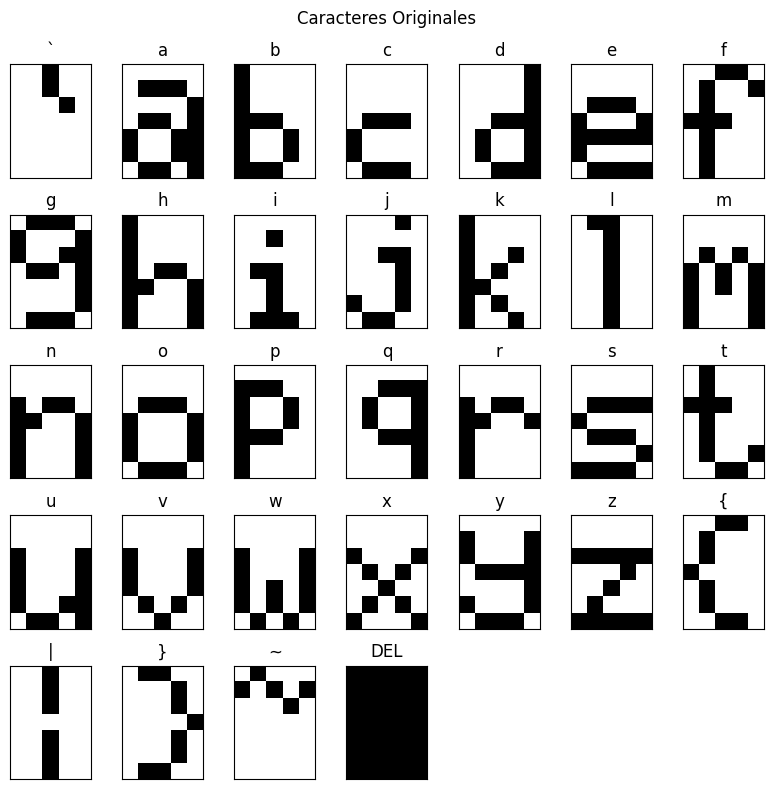

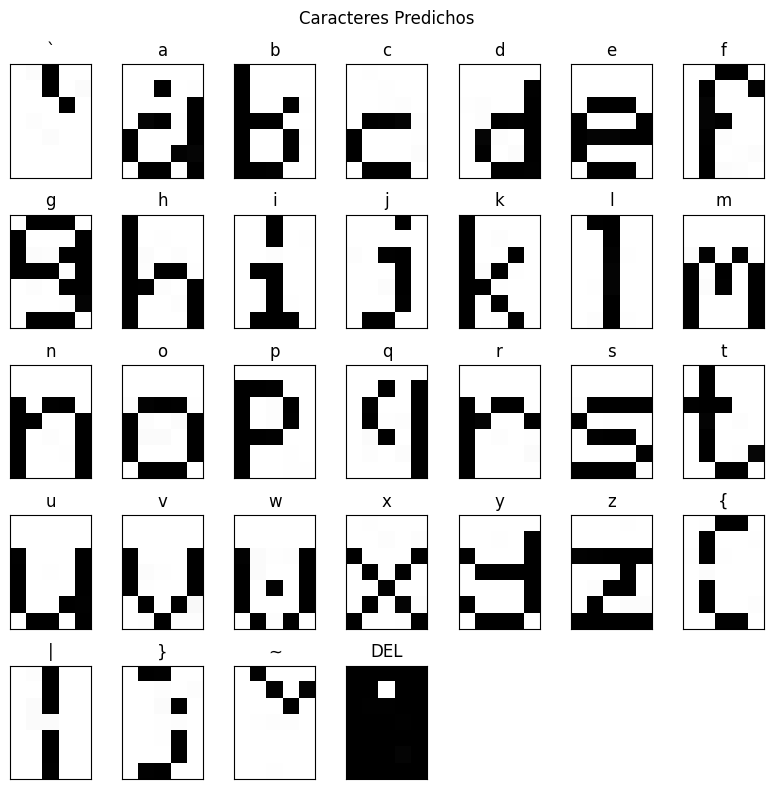

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.01429226636147125
Pixel 29 of 'e' is different: 0 != 0.999999999999851
Pixel 15 of 'f' is different: 1 != 1.1663927067247548e-08
Pixel 34 of 'g' is different: 0 != 1.0
Pixel 27 of 'k' is different: 1 != 1.503754590968377e-17
Pixel 17 of 'm' is different: 1 != 1.4461144301726646e-09
Pixel 7 of 'p' is different: 1 != 1.966630782922161e-29
Pixel 23 of 'q' is different: 1 != 1.715749747229843e-22
Pixel 14 of 's' is different: 1 != 1.0085145117088428e-29
Pixel 29 of 's' is different: 1 != 7.089081564241707e-16
Error en la reconstruccion del caracter 's'
Pixel 10 of 't' is different: 1 != 1.1843904370010176e-25
Pixel 16 of 't' is different: 1 != 1.5642797704163527e-13
Error en la reconstruccion del caracter 't'
Pixel 30 of 'x' is different: 1 != 6.318650461416817e-14
Pixel 34 of 'y' is different: 0 != 0.9999999999999998
Pixel 12 of 'z' is different: 1 != 2.134417955776172e-17
Pixel 30 of 'z' is different: 1 !=

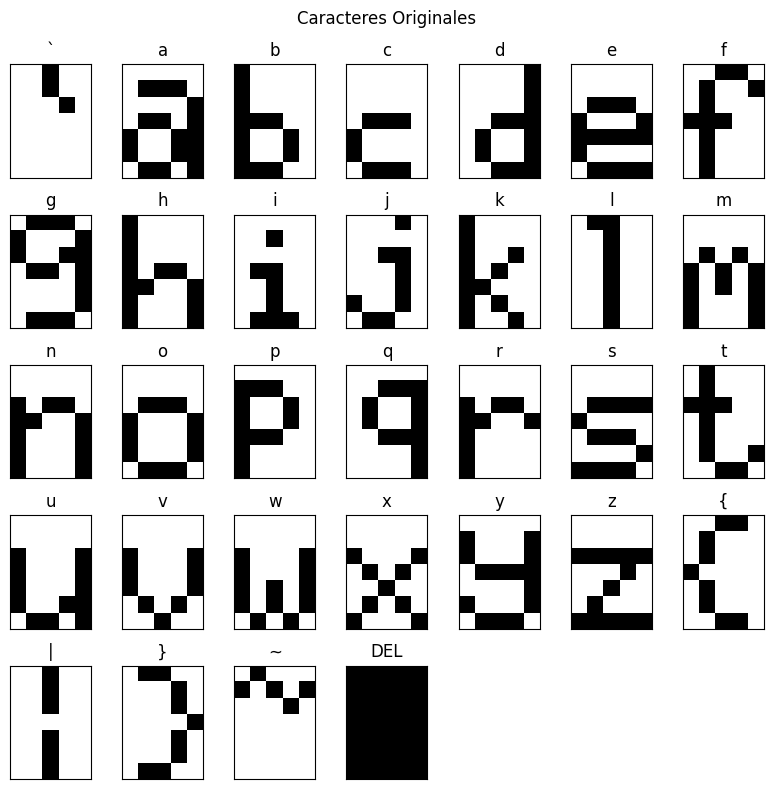

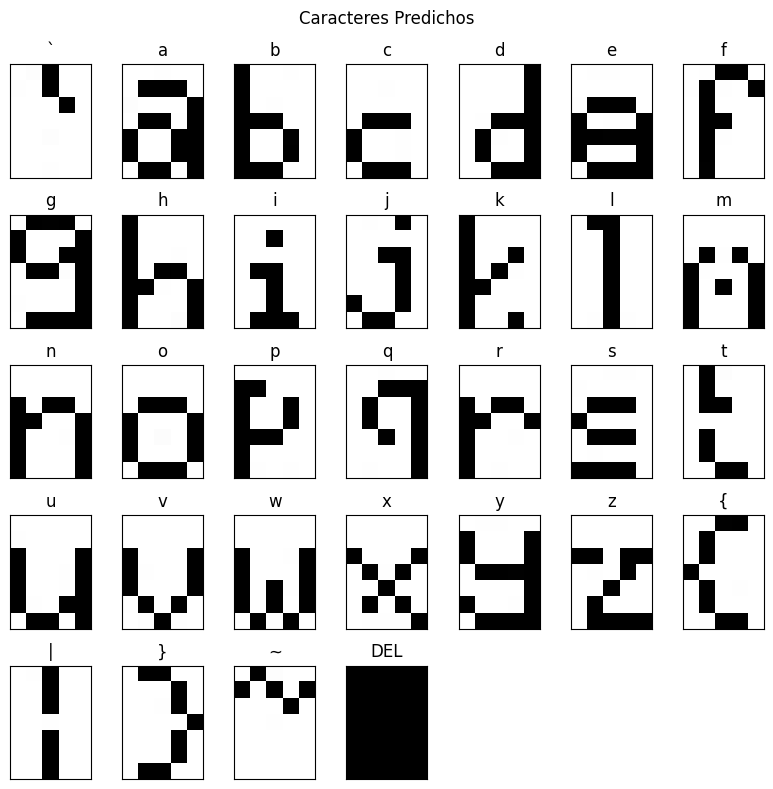

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.02144158107328063
Pixel 6 of 'a' is different: 1 != 4.3593265868197074e-13
Pixel 21 of 'e' is different: 1 != 1.7632763101361434e-10
Pixel 15 of 'f' is different: 1 != 1.8239531513527875e-29
Pixel 32 of 'f' is different: 0 != 1.0
Error en la reconstruccion del caracter 'f'
Pixel 5 of 'g' is different: 1 != 3.543655894989536e-14
Pixel 33 of 'k' is different: 1 != 8.391606667371559e-32
Pixel 10 of 'm' is different: 0 != 0.9999999999988676
Pixel 6 of 'p' is different: 1 != 1.1024903761657306e-16
Pixel 8 of 'q' is different: 1 != 7.085898775713378e-09
Pixel 15 of 's' is different: 1 != 2.984873525089428e-21
Pixel 30 of 's' is different: 1 != 7.228373785369702e-14
Error en la reconstruccion del caracter 's'
Pixel 1 of 't' is different: 1 != 1.5775767429088235e-07
Pixel 25 of 'v' is different: 0 != 1.0
Pixel 27 of 'w' is different: 1 != 2.2872879526788095e-10
Pixel 28 of 'x' is different: 1 != 1.02554198222436

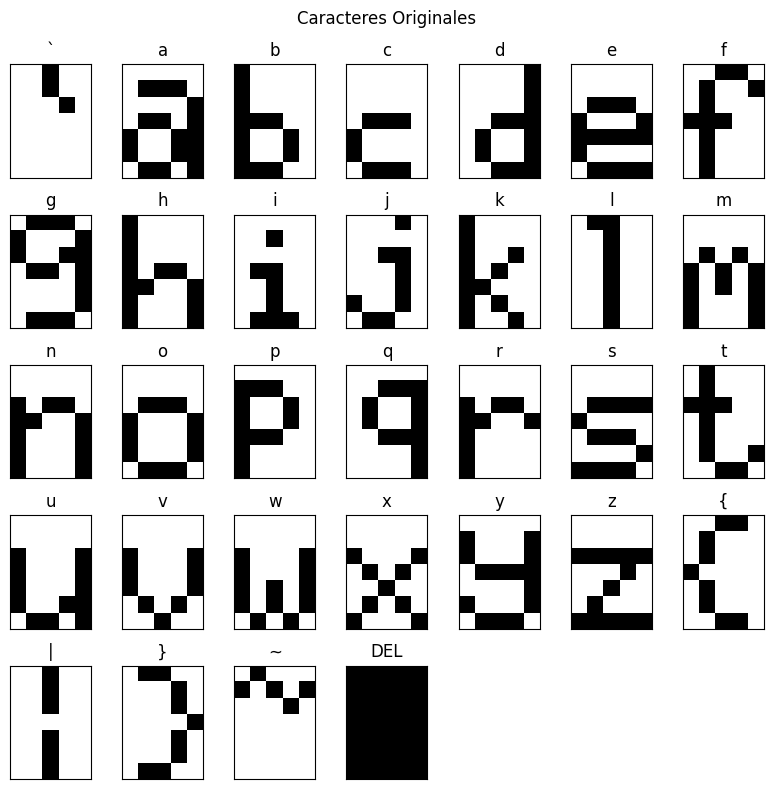

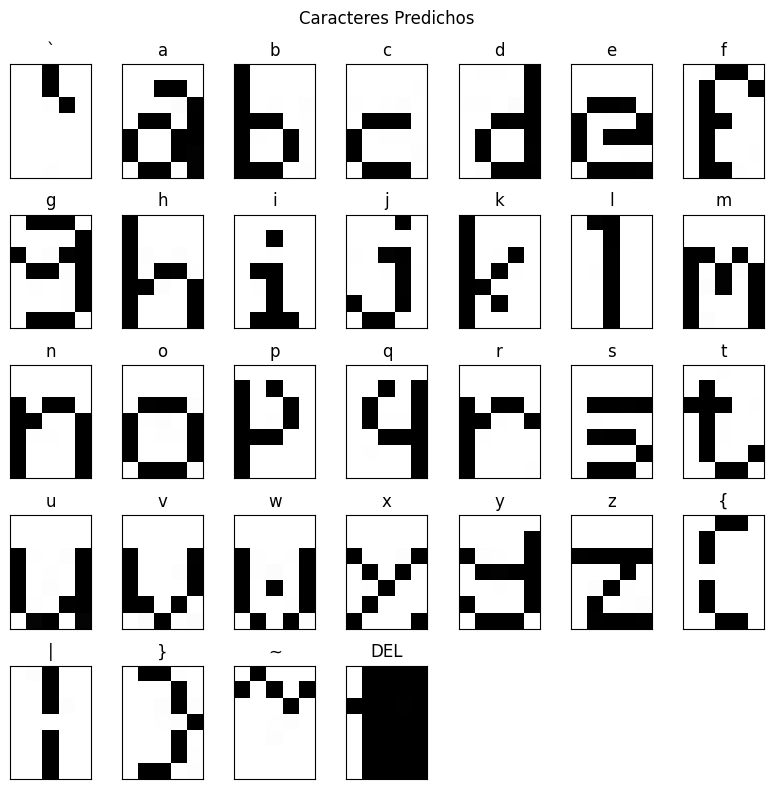

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.009852058313300906
Pixel 18 of 'j' is different: 1 != 3.113538573723519e-15
Pixel 16 of 'n' is different: 1 != 5.4735866904039983e-08
Pixel 6 of 'p' is different: 1 != 2.7837141417209357e-37
Pixel 7 of 'p' is different: 1 != 1.5806323296146101e-09
Error en la reconstruccion del caracter 'p'
Pixel 16 of 'r' is different: 1 != 1.6697734457341584e-06
Pixel 30 of 's' is different: 1 != 2.2432818130415312e-13
Pixel 28 of 'v' is different: 1 != 8.814598573063881e-12
Pixel 14 of 'w' is different: 1 != 1.0632153258836435e-11
Pixel 28 of 'x' is different: 1 != 2.1000305350019386e-12
Pixel 30 of 'z' is different: 1 != 1.2545871032768625e-05
Pixel 5 of '~' is different: 1 != 2.935985163718421e-20


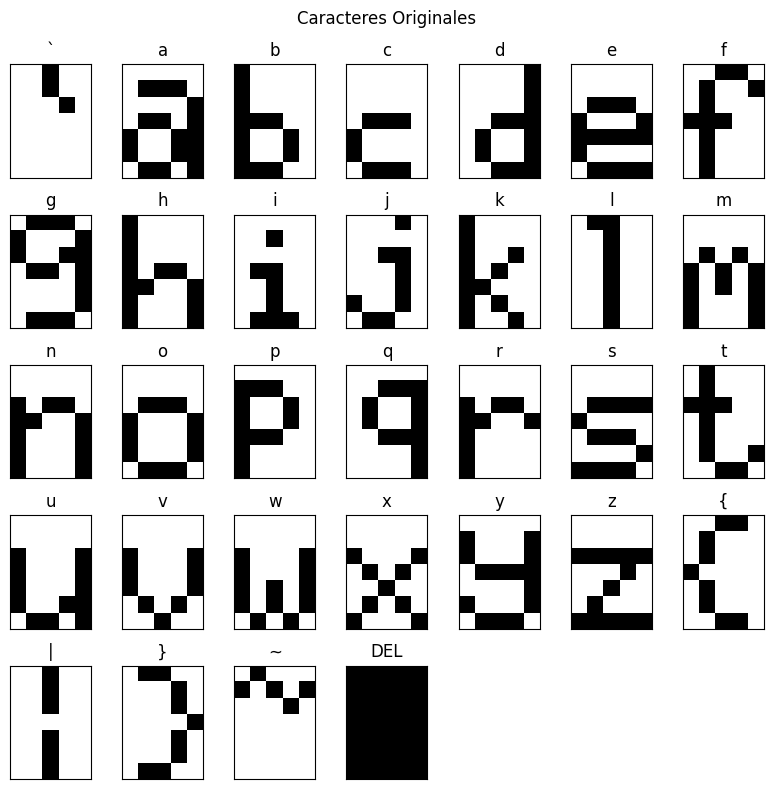

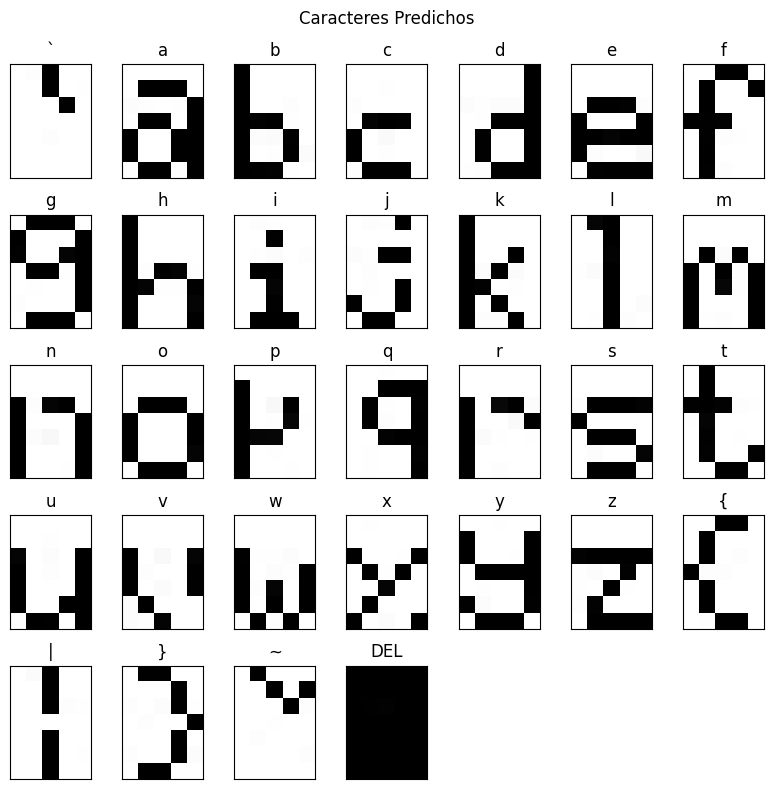

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.03482680551780091
Pixel 7 of 'a' is different: 1 != 8.057525330409164e-48
Pixel 23 of 'b' is different: 1 != 6.812841261963297e-13
Pixel 28 of 'b' is different: 1 != 3.8235542073924644e-16
Error en la reconstruccion del caracter 'b'
Pixel 20 of 'c' is different: 1 != 2.2352646701967034e-28
Pixel 16 of 'd' is different: 0 != 0.9999999999998823
Pixel 26 of 'd' is different: 1 != 3.7532029915556703e-10
Error en la reconstruccion del caracter 'd'
Pixel 29 of 'e' is different: 0 != 0.9999999999999998
Pixel 15 of 'f' is different: 1 != 1.2891924940103583e-26
Pixel 32 of 'f' is different: 0 != 1.0
Error en la reconstruccion del caracter 'f'
Pixel 5 of 'g' is different: 1 != 9.707074548376916e-39
Pixel 13 of 'g' is different: 1 != 1.6633062423721475e-26
Error en la reconstruccion del caracter 'g'
Pixel 25 of 'j' is different: 1 != 4.4218155536292664e-21
Pixel 33 of 'k' is different: 1 != 7.429332044563213e-10
Pi

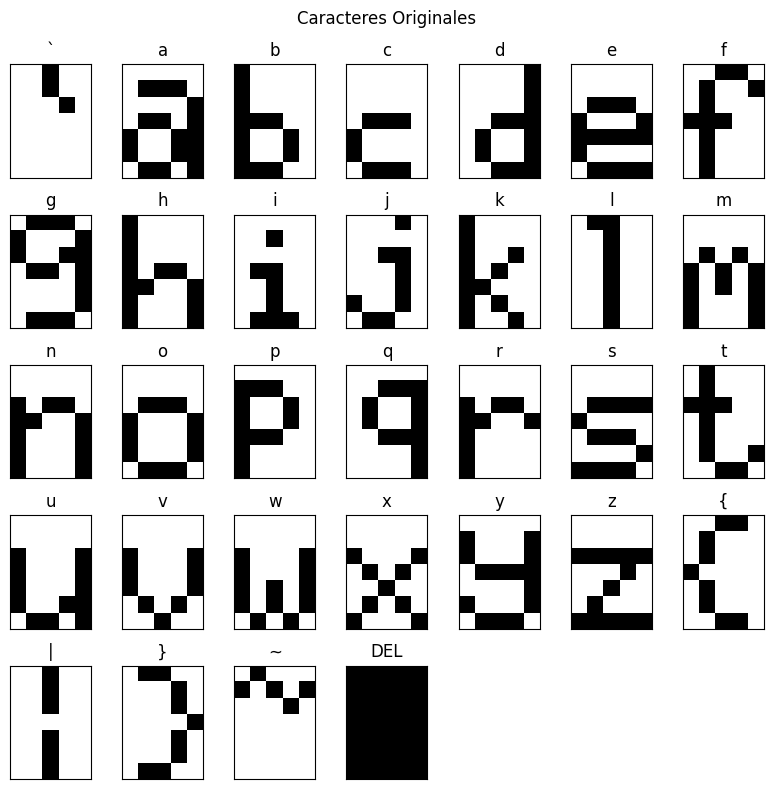

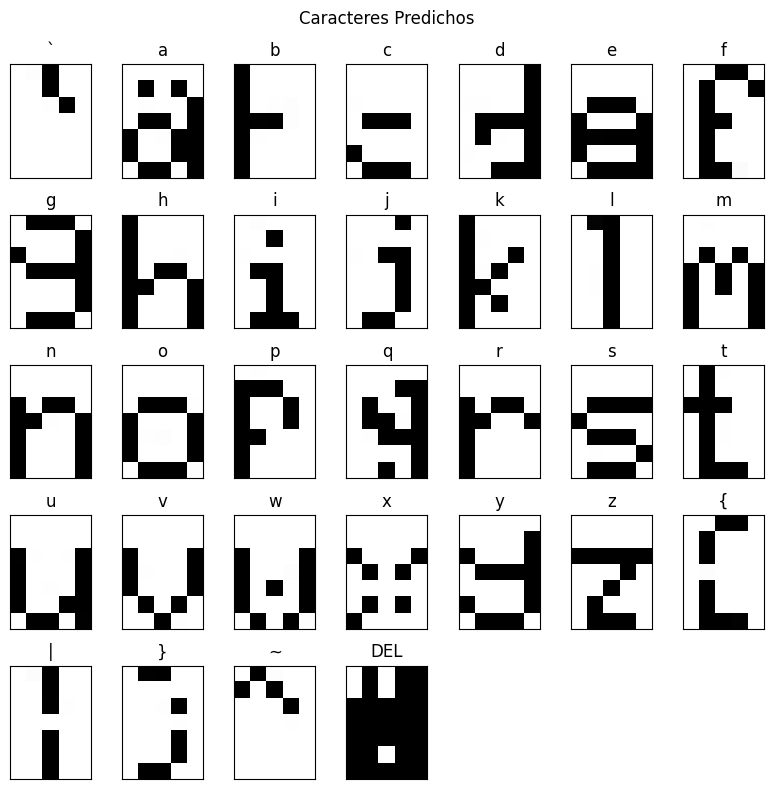

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.016083351398246837
Pixel 23 of 'b' is different: 1 != 7.057285068869635e-14
Pixel 4 of 'd' is different: 1 != 7.498991137744555e-13
Pixel 21 of 'd' is different: 1 != 4.338039885014896e-08
Error en la reconstruccion del caracter 'd'
Pixel 2 of 'g' is different: 1 != 2.2751894306372324e-13
Pixel 13 of 'g' is different: 1 != 3.5444745243249282e-37
Error en la reconstruccion del caracter 'g'
Pixel 18 of 'j' is different: 1 != 5.103639009158752e-12
Pixel 23 of 'j' is different: 1 != 3.4495248859425774e-10
Error en la reconstruccion del caracter 'j'
Pixel 6 of 'p' is different: 1 != 9.173219873770327e-15
Pixel 34 of 's' is different: 0 != 0.9999988779256955
Pixel 12 of 't' is different: 1 != 2.2706993986789497e-25
Pixel 22 of 'w' is different: 1 != 4.260218082166561e-09
Pixel 32 of 'w' is different: 0 != 0.9999999999999991
Error en la reconstruccion del caracter 'w'
Pixel 8 of '}' is different: 1 != 1.9331502

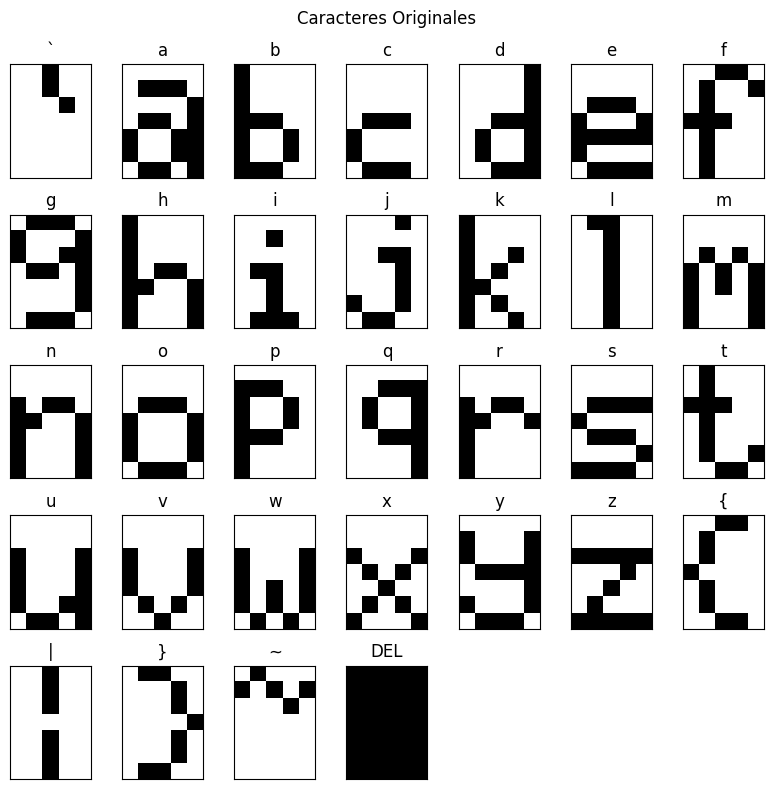

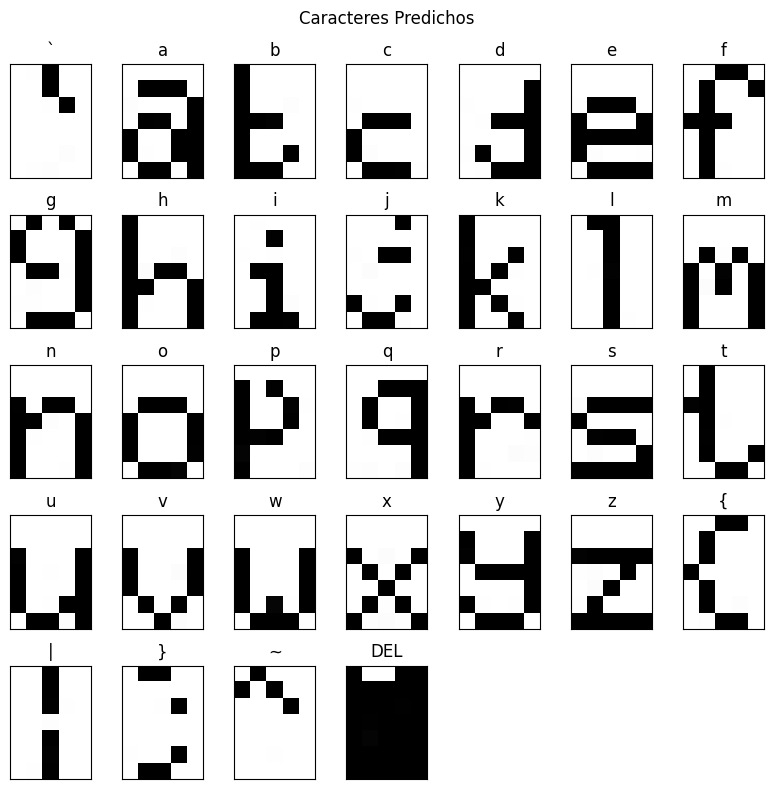

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.022331962237801335
Pixel 6 of 'a' is different: 1 != 4.2864496796635e-18
Pixel 21 of 'b' is different: 0 != 0.9999999994212581
Pixel 20 of 'c' is different: 1 != 1.4941753377915596e-20
Pixel 25 of 'c' is different: 1 != 1.4073402001036587e-26
Error en la reconstruccion del caracter 'c'
Pixel 31 of 'd' is different: 0 != 0.9999999999976865
Pixel 9 of 'f' is different: 1 != 4.529853074356836e-22
Pixel 32 of 'f' is different: 0 != 1.0
Error en la reconstruccion del caracter 'f'
Pixel 1 of 'g' is different: 1 != 1.0504648621689556e-14
Pixel 5 of 'g' is different: 1 != 7.1830231109302575e-28
Error en la reconstruccion del caracter 'g'
Pixel 29 of 'h' is different: 1 != 1.0992980510040182e-11
Pixel 25 of 'j' is different: 1 != 4.551166838662762e-26
Pixel 17 of 'm' is different: 1 != 2.932877545000645e-12
Pixel 7 of 'p' is different: 1 != 4.4473903942420016e-30
Pixel 11 of 'q' is different: 1 != 2.7843505381408

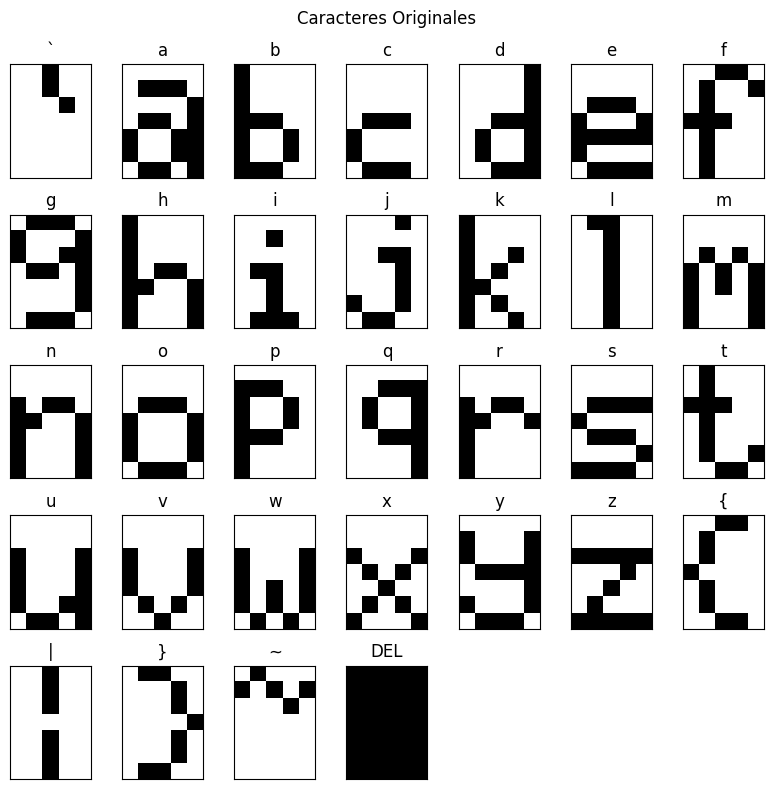

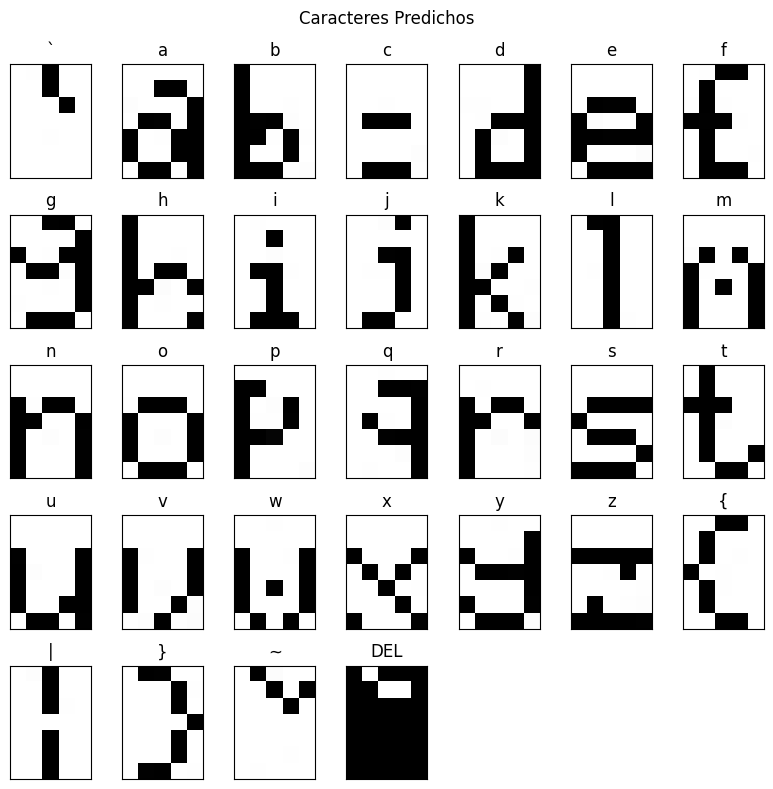

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.018781526805643736
Pixel 6 of 'a' is different: 1 != 5.1668366909683076e-33
Pixel 23 of 'b' is different: 1 != 1.617036155606037e-11
Pixel 21 of 'd' is different: 1 != 3.4955945801189875e-10
Pixel 32 of 'f' is different: 0 != 0.999995630473021
Pixel 27 of 'k' is different: 1 != 7.9236611380279635e-28
Pixel 11 of 'q' is different: 1 != 3.433598157198411e-12
Pixel 14 of 's' is different: 1 != 1.5289464302786014e-17
Pixel 1 of 't' is different: 1 != 2.484684001375838e-07
Pixel 16 of 't' is different: 1 != 6.039767425637046e-17
Error en la reconstruccion del caracter 't'
Pixel 27 of 'w' is different: 1 != 2.4540965218194823e-25
Pixel 33 of 'w' is different: 1 != 4.190336773755543e-05
Error en la reconstruccion del caracter 'w'
Pixel 15 of 'x' is different: 0 != 0.9999968520702224
Pixel 20 of 'x' is different: 0 != 1.0
Error en la reconstruccion del caracter 'x'
Pixel 14 of 'z' is different: 1 != 2.3806090080

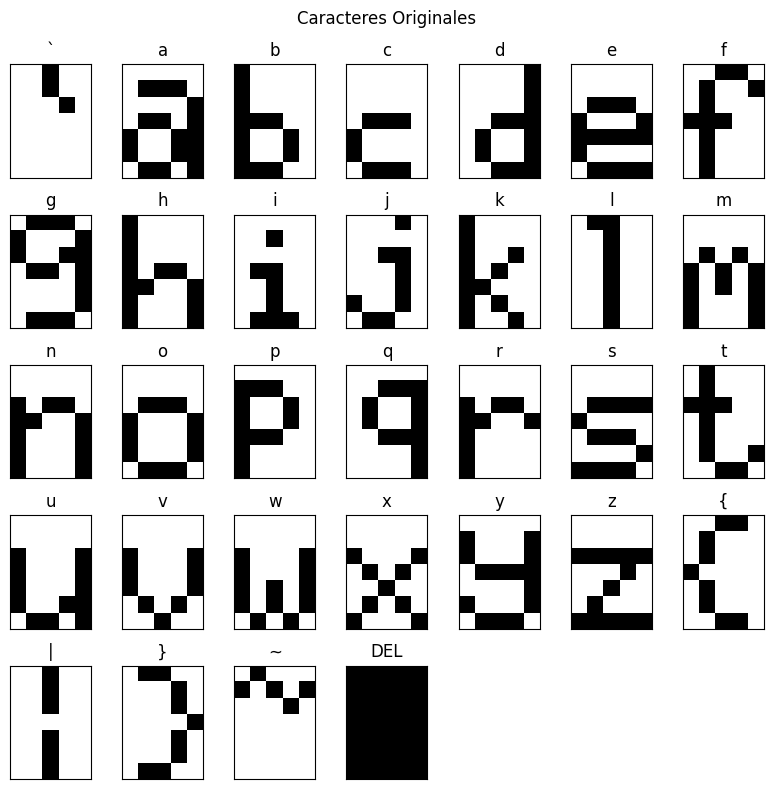

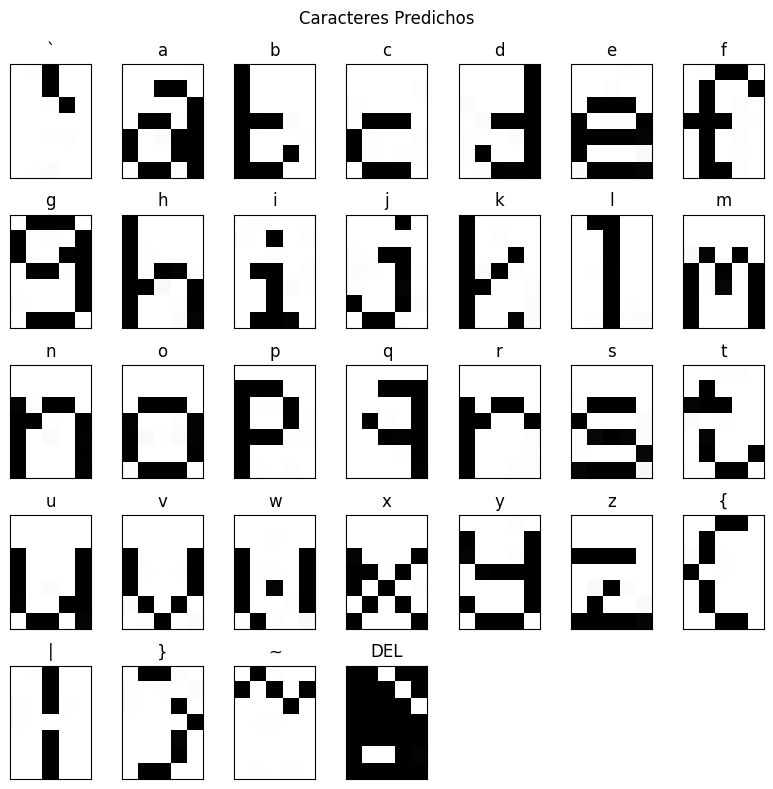

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.018794647336475526
Pixel 21 of 'd' is different: 1 != 7.388162593882922e-31
Pixel 9 of 'f' is different: 1 != 1.1531745738432526e-41
Pixel 25 of 'j' is different: 1 != 2.4858943160488658e-11
Pixel 17 of 'm' is different: 1 != 6.55991822793115e-08
Pixel 7 of 'p' is different: 1 != 2.201107989321078e-43
Pixel 18 of 'p' is different: 1 != 7.820236611108287e-12
Error en la reconstruccion del caracter 'p'
Pixel 22 of 'q' is different: 1 != 8.304122377924886e-09
Pixel 14 of 's' is different: 1 != 1.0138931741827284e-14
Pixel 1 of 't' is different: 1 != 2.2752182152180437e-17
Pixel 29 of 'v' is different: 0 != 0.999999999990207
Pixel 15 of 'x' is different: 0 != 1.0
Pixel 20 of 'x' is different: 0 != 0.9999999999999996
Error en la reconstruccion del caracter 'x'
Pixel 5 of 'y' is different: 1 != 4.3153622954876774e-09
Pixel 14 of 'z' is different: 1 != 5.740100214331073e-12
Pixel 30 of 'z' is different: 1 != 2.

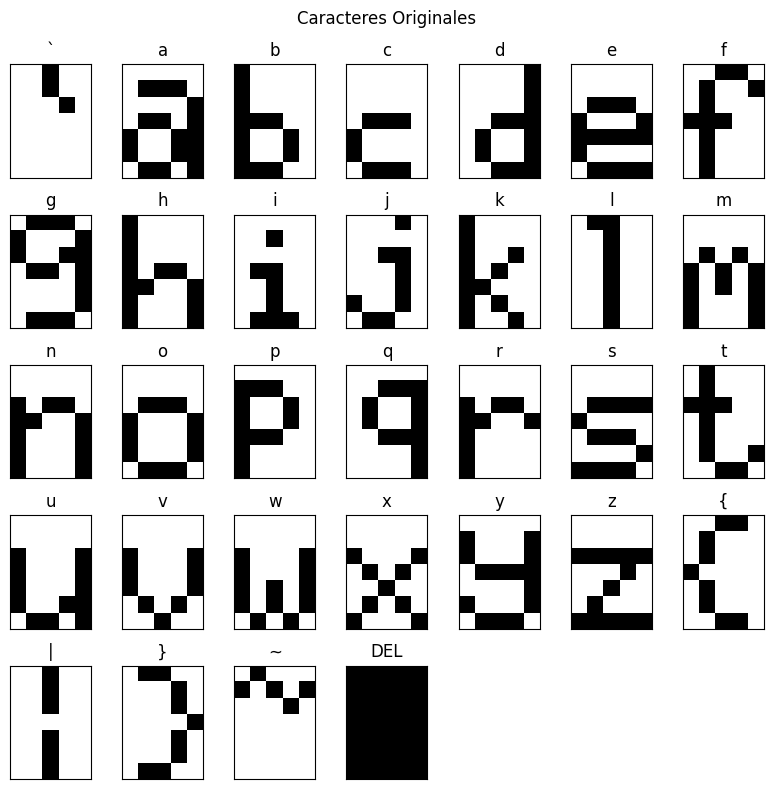

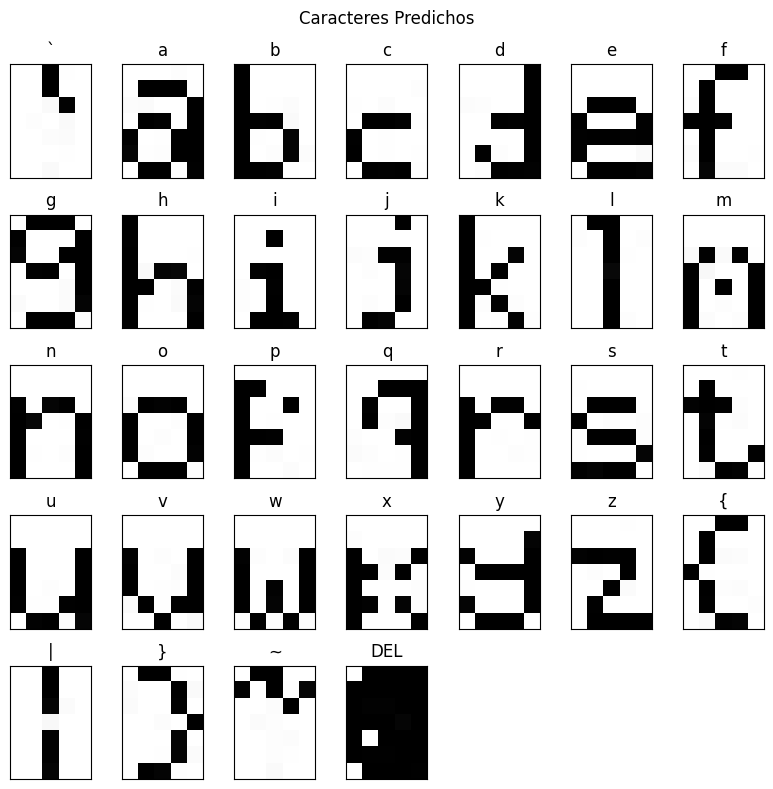

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.015195977489910306
Pixel 23 of 'b' is different: 1 != 5.5078461302735225e-21
Pixel 9 of 'f' is different: 1 != 2.8364500143196914e-26
Pixel 3 of 'g' is different: 1 != 2.3844620218534732e-21
Pixel 2 of 'j' is different: 0 != 0.9999999999999978
Pixel 33 of 'k' is different: 1 != 1.9340866087709829e-13
Pixel 11 of 'm' is different: 1 != 3.735024128278024e-15
Pixel 6 of 'p' is different: 1 != 3.0681864952260116e-24
Pixel 11 of 'q' is different: 1 != 1.1167606230641084e-14
Pixel 22 of 'w' is different: 1 != 4.3004600597843857e-10
Pixel 32 of 'w' is different: 0 != 0.9999999999945293
Error en la reconstruccion del caracter 'w'
Pixel 8 of '}' is different: 1 != 2.185495929167745e-29
Pixel 19 of '}' is different: 1 != 2.420537635091751e-16
Error en la reconstruccion del caracter '}'
Pixel 9 of '~' is different: 1 != 7.169155506397776e-38
Pixel 3 of 'DEL' is different: 1 != 2.3935963828436284e-16
Pixel 27 of 'DE

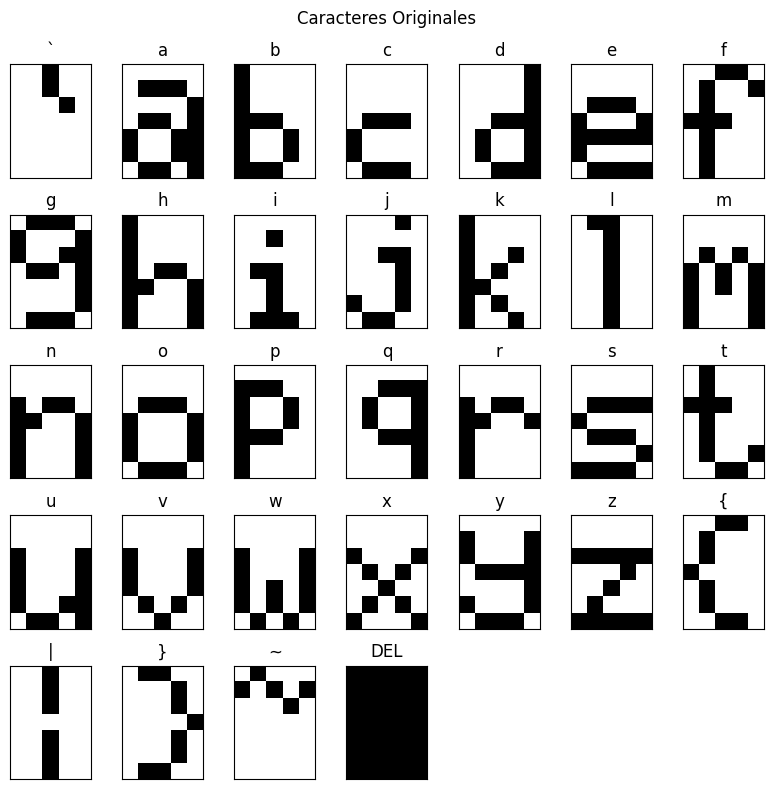

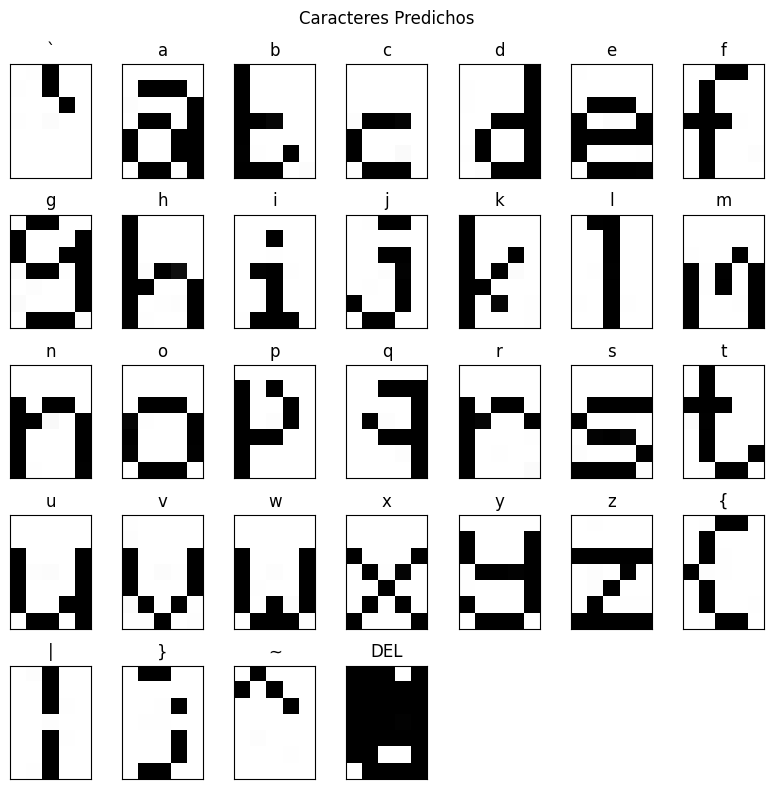

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.02679306661050151
Pixel 6 of 'a' is different: 1 != 6.697890242602793e-44
Pixel 13 of 'b' is different: 0 != 0.9999999998990348
Pixel 13 of 'c' is different: 0 != 0.9999999999999929
Pixel 23 of 'c' is different: 0 != 0.9999999135286491
Error en la reconstruccion del caracter 'c'
Pixel 26 of 'd' is different: 1 != 4.377317342824506e-39
Pixel 21 of 'e' is different: 1 != 3.306793679305872e-08
Pixel 34 of 'e' is different: 1 != 3.7963259146704516e-16
Error en la reconstruccion del caracter 'e'
Pixel 15 of 'f' is different: 1 != 8.893213768163254e-23
Pixel 31 of 'i' is different: 1 != 9.446972219724305e-09
Pixel 27 of 'k' is different: 1 != 1.4430833292957413e-10
Pixel 7 of 'p' is different: 1 != 7.805468336179913e-19
Pixel 23 of 'q' is different: 1 != 9.293541231268288e-17
Pixel 14 of 's' is different: 1 != 4.589745502278465e-26
Pixel 18 of 's' is different: 0 != 0.9999999999973324
Error en la reconstruccio

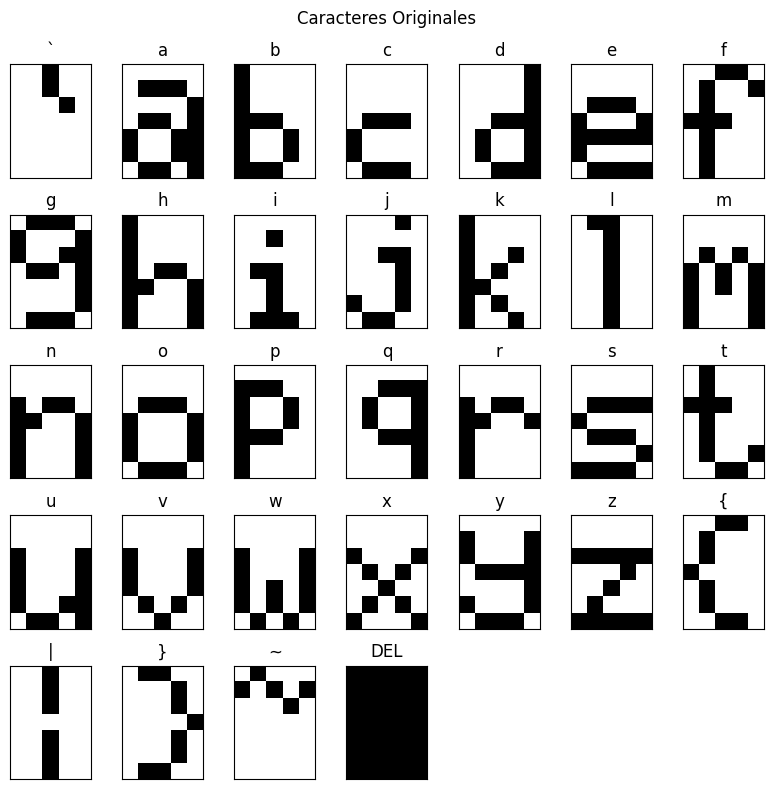

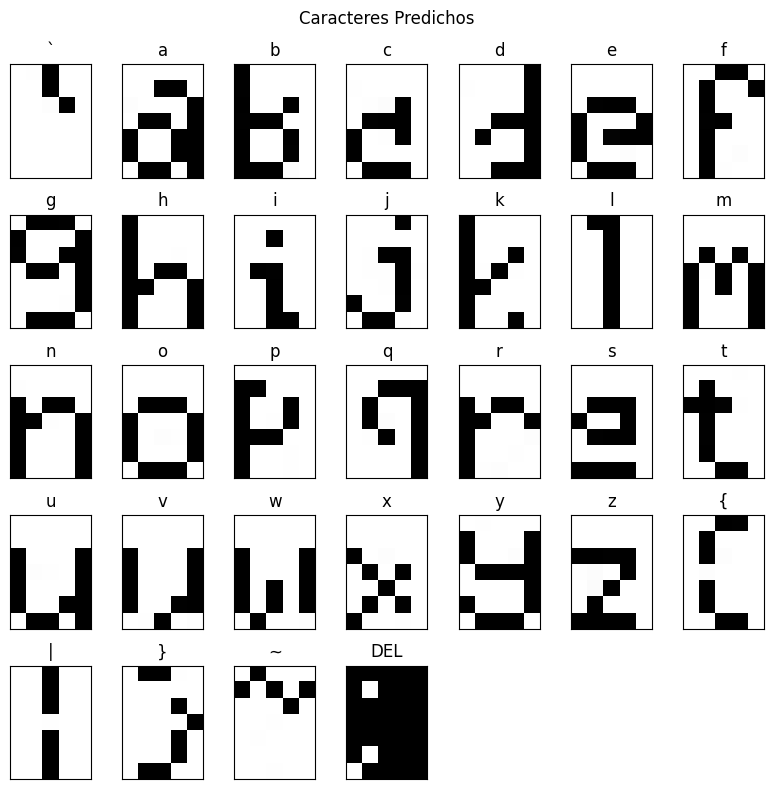

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.009868846367883825
Pixel 18 of 'b' is different: 0 != 0.9999733527412387
Pixel 16 of 'd' is different: 0 != 0.9999999799493249
Pixel 26 of 'f' is different: 1 != 1.0039600492162301e-12
Pixel 25 of 'j' is different: 1 != 1.3916302961851311e-18
Pixel 17 of 'm' is different: 1 != 5.33121085405729e-32
Pixel 16 of 'n' is different: 1 != 3.13862448001929e-13
Pixel 6 of 'p' is different: 1 != 1.8016990708988918e-12
Pixel 7 of 'p' is different: 1 != 1.3818529462463095e-18
Error en la reconstruccion del caracter 'p'
Pixel 16 of 'r' is different: 1 != 2.1708124861558783e-12
Pixel 29 of 't' is different: 1 != 1.238340687884089e-13
Pixel 12 of 'DEL' is different: 1 != 8.316837487298994e-19


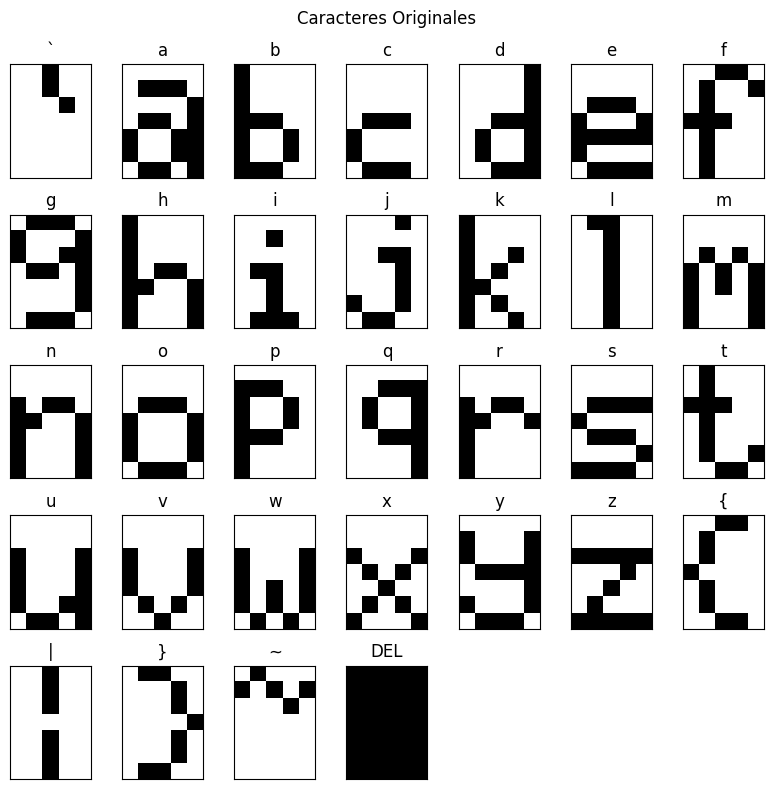

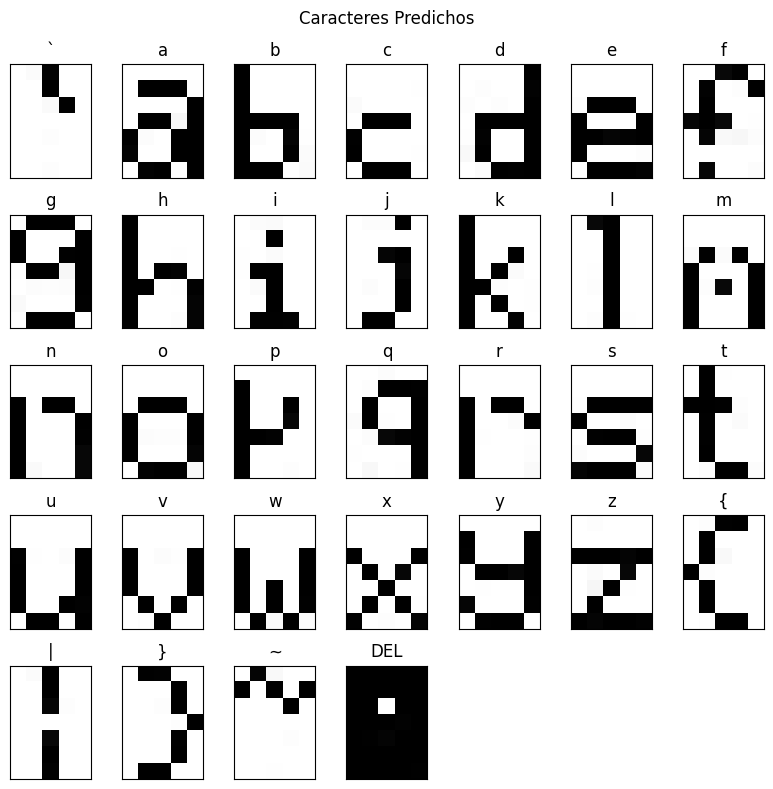

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.026798051005509697
Pixel 16 of 'd' is different: 0 != 0.9999999973595219
Pixel 21 of 'd' is different: 1 != 4.124247665583574e-18
Error en la reconstruccion del caracter 'd'
Pixel 11 of 'f' is different: 1 != 5.942285823420876e-13
Pixel 15 of 'f' is different: 1 != 1.3616225059311026e-10
Error en la reconstruccion del caracter 'f'
Pixel 5 of 'g' is different: 1 != 2.083145457264943e-11
Pixel 13 of 'g' is different: 1 != 1.2385083954049124e-12
Error en la reconstruccion del caracter 'g'
Pixel 27 of 'k' is different: 1 != 1.6835005874129993e-27
Pixel 33 of 'k' is different: 1 != 1.9484932471083243e-06
Error en la reconstruccion del caracter 'k'
Pixel 11 of 'q' is different: 1 != 8.869755725734597e-20
Pixel 17 of 'q' is different: 0 != 0.9999999999999998
Error en la reconstruccion del caracter 'q'
Pixel 14 of 's' is different: 1 != 2.7381834197601507e-14
Pixel 29 of 's' is different: 1 != 2.712341950244853e

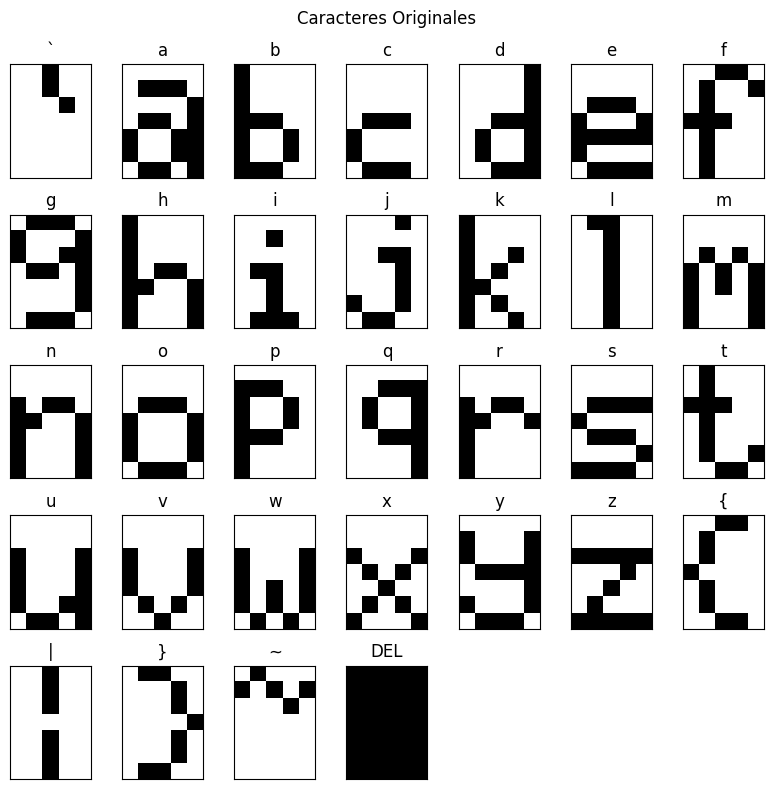

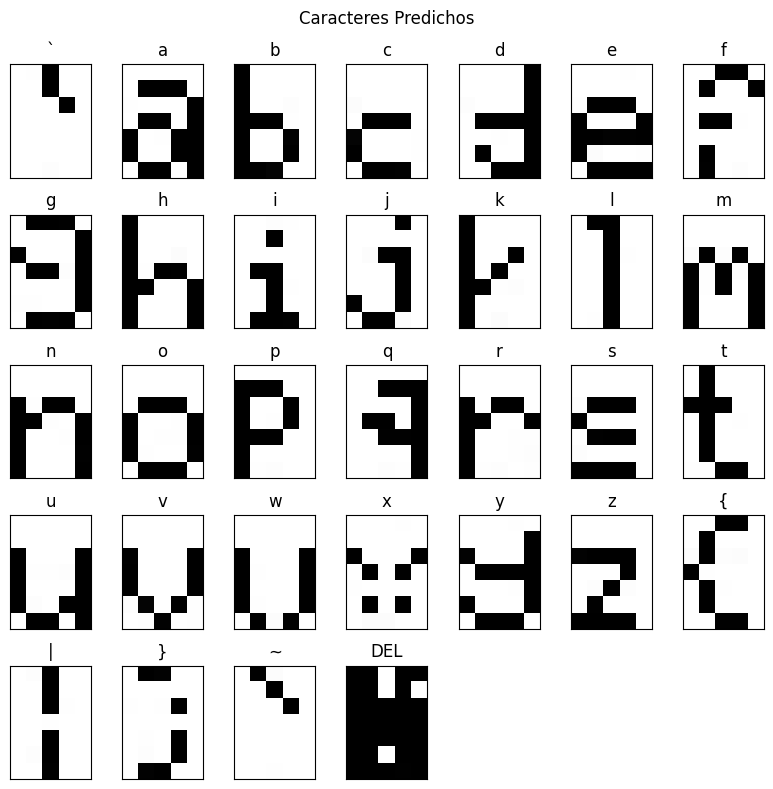

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.024121545431945394
Pixel 7 of 'a' is different: 1 != 3.309437429961943e-50
Pixel 31 of 'b' is different: 1 != 8.106301529485838e-06
Pixel 18 of 'd' is different: 1 != 9.913775956483295e-15
Pixel 34 of 'e' is different: 1 != 1.837494600459991e-10
Pixel 5 of 'g' is different: 1 != 7.902518413255429e-11
Pixel 31 of 'i' is different: 1 != 4.546571644772261e-12
Pixel 3 of 'j' is different: 1 != 4.516807489208176e-28
Pixel 10 of 'm' is different: 0 != 0.9999999999997669
Pixel 12 of 'n' is different: 1 != 1.1725938078707616e-09
Pixel 7 of 'q' is different: 1 != 7.522632340581204e-46
Pixel 11 of 'q' is different: 1 != 2.2937388738294212e-11
Error en la reconstruccion del caracter 'q'
Pixel 12 of 'r' is different: 1 != 9.125966549175467e-11
Pixel 30 of 's' is different: 1 != 7.609089831803046e-18
Pixel 25 of 'v' is different: 0 != 0.9999999998535849
Pixel 13 of 'x' is different: 0 != 1.0
Pixel 14 of 'x' is differ

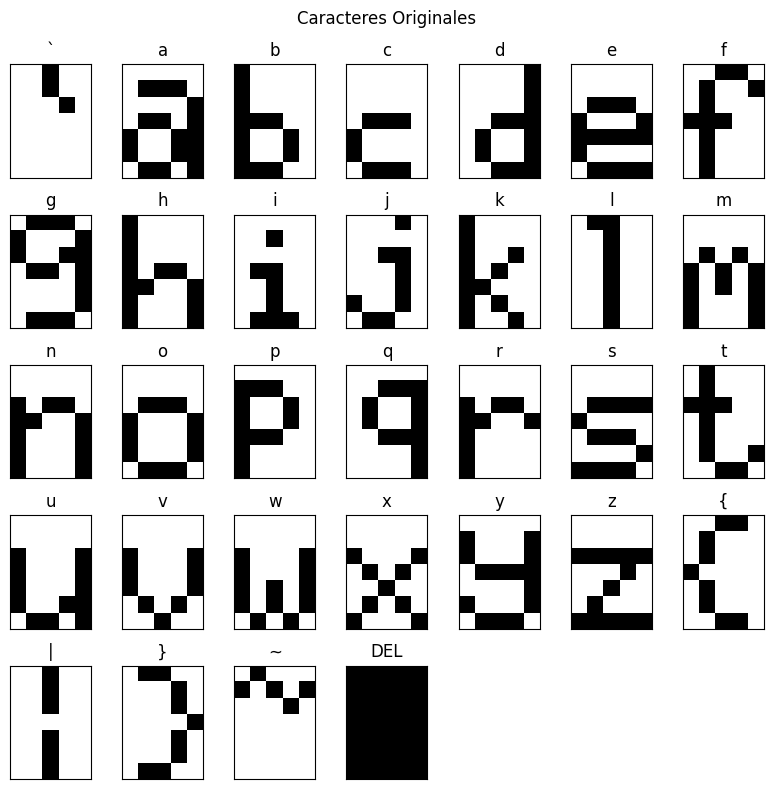

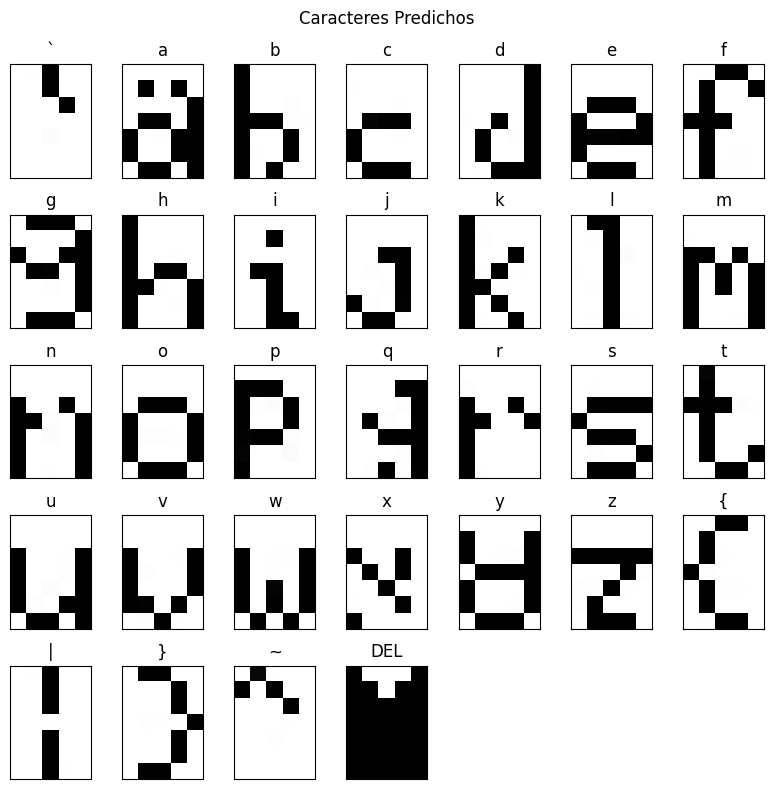

Entrenando con error maximo permitido de 0.02
Se entrenaron 15000 epochs. Error: 0.018770367737159302
Pixel 13 of 'b' is different: 0 != 0.9999999999997009
Pixel 20 of 'c' is different: 1 != 3.2896298175970455e-11
Pixel 15 of 'f' is different: 1 != 5.290567781186085e-18
Pixel 13 of 'h' is different: 0 != 1.0
Pixel 18 of 'h' is different: 1 != 2.1350364016759232e-21
Error en la reconstruccion del caracter 'h'
Pixel 3 of 'j' is different: 1 != 1.076210537388274e-21
Pixel 18 of 'j' is different: 1 != 7.767101543736778e-37
Error en la reconstruccion del caracter 'j'
Pixel 27 of 'k' is different: 1 != 6.881695193896305e-60
Pixel 6 of 'p' is different: 1 != 4.258684450704506e-42
Pixel 18 of 'p' is different: 1 != 4.255663447254412e-32
Error en la reconstruccion del caracter 'p'
Pixel 22 of 'q' is different: 1 != 3.57314428176418e-11
Pixel 31 of 'q' is different: 0 != 0.9999999809079382
Error en la reconstruccion del caracter 'q'
Pixel 14 of 's' is different: 1 != 9.120960051860929e-34
Pixel 

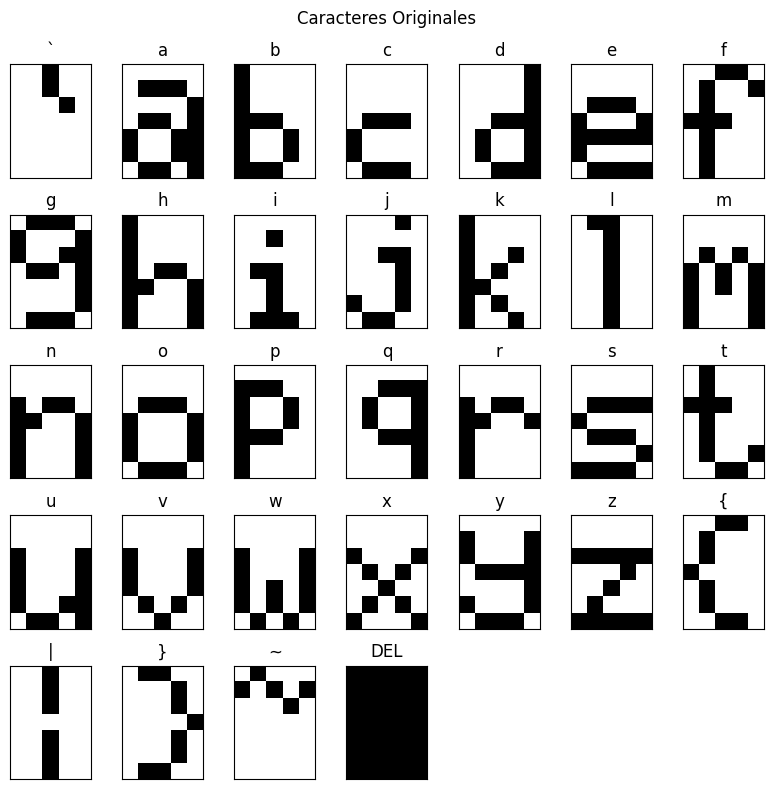

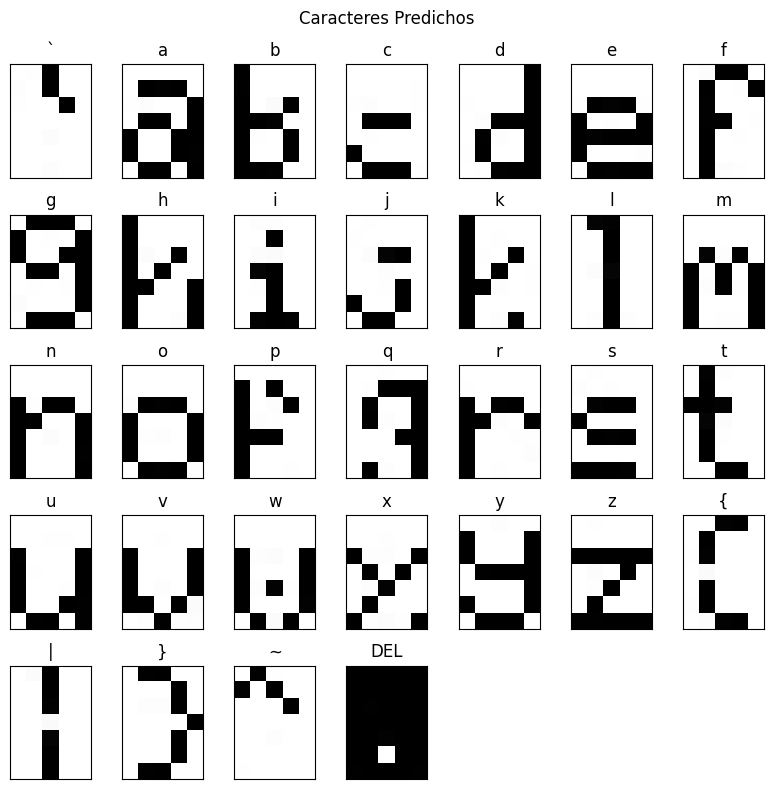

Entrenando con error maximo permitido de 0.02


In [7]:
characters = list(bitmapDict.keys())
print(characters)

#epochs = 5000
max_error = 0.02
while True:
    print(f"Entrenando con error maximo permitido de {max_error}")
    autoencoder = generate_autoencoder()
    error = train(autoencoder, mse, mse_derivative, X, X, epochs=15000, verbose=False)
    print(f"Se entrenaron {15000} epochs. Error: {error[-1]}")

    latent_spaces = []
    input_matrix_list = []
    output_matrix_list = []
    correct = 0
    for c in range(len(characters)):
        input_bitmap = []
        output_bitmap = []

        # X es una lista de listas de -listas con un solo elemento-
        for i in range(len(X[c])):
            input_bitmap.append(X[c][i][0])
        input_matrix_list.append(bitmap_as_matrix(input_bitmap))

        # El espacio latente es la salida de la "capa 8"
        outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[c], 6)
        latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

        for output in outputs:
            output_bitmap.append(output[0])

        if not compare_bitmaps(input_bitmap, output_bitmap, characters[c]):
            print(f"Error en la reconstruccion del caracter '{characters[c]}'")
           # break
        else:
            correct += 1
        
        output_matrix_list.append(bitmap_as_matrix(output_bitmap))

    if(correct == len(characters)):
        break

    #epochs += 1000 # Entreno 200 epochs mas
    #max_error *= 0.9 # Reduzco el error maximo permitido un 10%

    plot_bitmap_matrix_2(input_matrix_list, characters, "Caracteres Originales")
    plot_bitmap_matrix_2(output_matrix_list, characters, "Caracteres Predichos")
    

### Latent Space

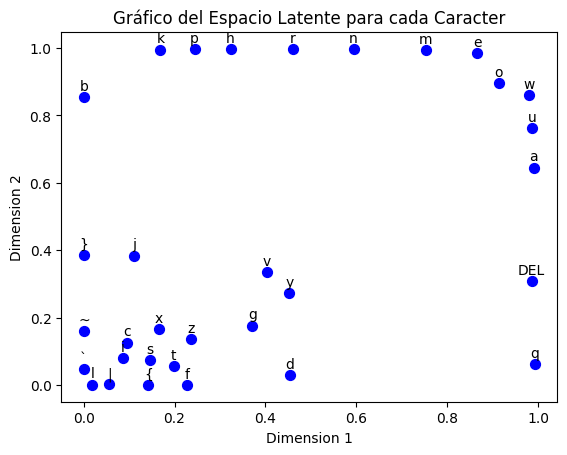

In [ ]:
plot_latent_spaces(latent_spaces, characters)

### Caracteres Nuevos

In [ ]:

bitmap_at = [
    [0], [1], [1], [1], [0],
    [1], [0], [0], [0], [1],
    [1], [0], [1], [1], [1],
    [1], [0], [1], [0], [1],
    [1], [0], [1], [1], [1],
    [1], [0], [0], [0], [0],
    [0], [1], [1], [1], [1]
]

bitmap_A = [
    [0], [0], [1], [0], [0],
    [0], [1], [0], [1], [0],
    [1], [0], [0], [0], [1],
    [1], [0], [0], [0], [1],
    [1], [1], [1], [1], [1],
    [1], [0], [0], [0], [1],
    [1], [0], [0], [0], [1]
]

bitmap_plus = [
    [0], [0], [0], [0], [0],
    [0], [0], [1], [0], [0],
    [0], [0], [1], [0], [0],
    [1], [1], [1], [1], [1],
    [0], [0], [1], [0], [0],
    [0], [0], [1], [0], [0],
    [0], [0], [0], [0], [0],
]

new_X = [bitmap_at, bitmap_A, bitmap_plus] 
new_characters = ["@", "A", "+"]
print(new_characters)


new_latent_spaces = []
for c in range(len(new_characters)):
    input_bitmap = []
    output_bitmap = []

    # X es una lista de listas de -listas con un solo elemento-
    for i in range(len(new_X[c])):
        input_bitmap.append(new_X[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)

    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, new_X[c], 6)
    new_latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(round(abs(output[0])))
    

    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    # Marcamos en gris los pixeles que cambiaron
    for i in range(len(output_bitmap_matrix)):
        for j in range(len(output_bitmap_matrix[i])):
            if output_bitmap_matrix[i][j] != input_bitmap_matrix[i][j]:
                output_bitmap_matrix[i][j] = 0.3
    
    plot_bitmap_matrix(input_bitmap_matrix, output_bitmap_matrix, new_characters[c])

['@', 'A', '+']


NameError: name 'bitmap_as_matrix' is not defined

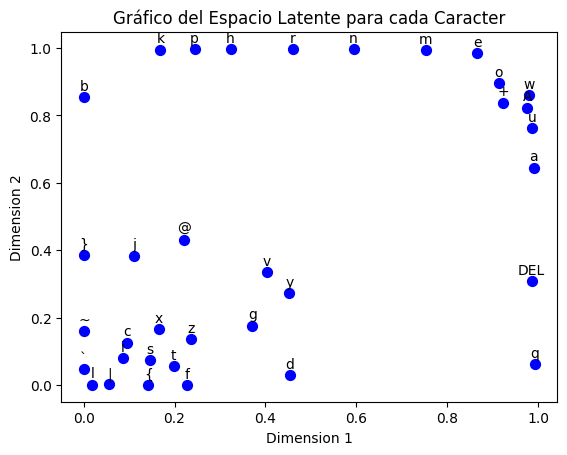

In [ ]:
final_chars = characters + new_characters
final_latent_spaces = latent_spaces + new_latent_spaces
plot_latent_spaces(final_latent_spaces, final_chars)